In [1]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for Tesla (ticker symbol: TSLA)
tesla = yf.Ticker("TSLA")

# Retrieve historical data for Tesla with a specified period
tesla_data = tesla.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Save the DataFrame to a CSV file, if needed (optional)
tesla_data.to_csv("tesla_stock_data.csv", index=False)

# Display the first five rows of the tesla_data DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

# URL provided for scraping
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table in the HTML
table = soup.find('table')

# Convert the table to a DataFrame
# Use StringIO to handle the HTML string correctly
tesla_revenue = pd.read_html(StringIO(str(table)))[0]

# Assuming the DataFrame columns need renaming based on the specific table structure
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '').astype(float)

# Display the last five rows of the DataFrame
print(tesla_revenue.tail())

    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


In [17]:
import yfinance as yf
import pandas as pd

# Create a Ticker object for GameStop (ticker symbol: GME)
gme = yf.Ticker("GME")

# Retrieve historical data for GameStop with the maximum available period
gme_data = gme.history(period="max")

# Reset the index of the DataFrame to make the Date column a regular column
gme_data.reset_index(inplace=True)

# Save the DataFrame to a CSV file
gme_data.to_csv("gme_stock_data.csv", index=False)

# Display the first five rows of the gme_data DataFrame
print(gme_data.head())


                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [27]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from io import StringIO

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables in the HTML
tables = soup.find_all('table')

gme_table = tables[1]

# Convert the correct table to a DataFrame using StringIO to handle the HTML string properly
gme_revenue = pd.read_html(StringIO(str(gme_table)), flavor='bs4')[0]

# Clean and prepare the DataFrame
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(r'[\$,]', '', regex=True).astype(float)

# Drop rows with NaN values if necessary
gme_revenue.dropna(inplace=True)

# Display the last five rows of the DataFrame
print(gme_revenue.tail())


          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


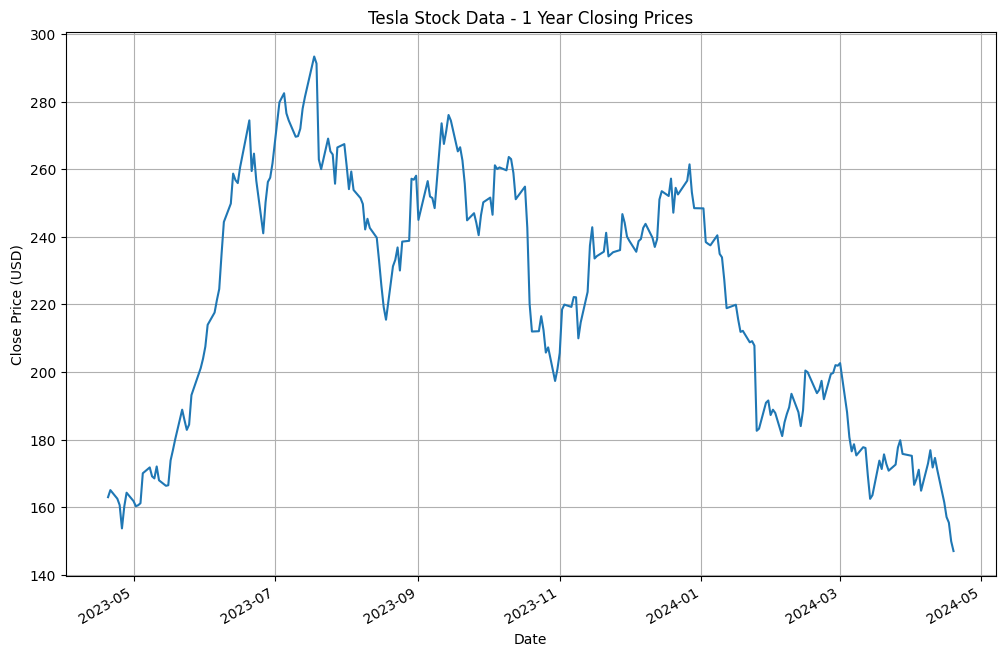

In [21]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Retrieve Tesla stock data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1y")  # You can adjust the period as needed

# Define the make_graph function
def make_graph(stock_data, title):
    plt.figure(figsize=(12, 8))
    stock_data['Close'].plot()
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.grid(True)
    plt.show()

# Use the make_graph function to graph the Tesla Stock Data
make_graph(tesla_data, 'Tesla Stock Data - 1 Year Closing Prices')

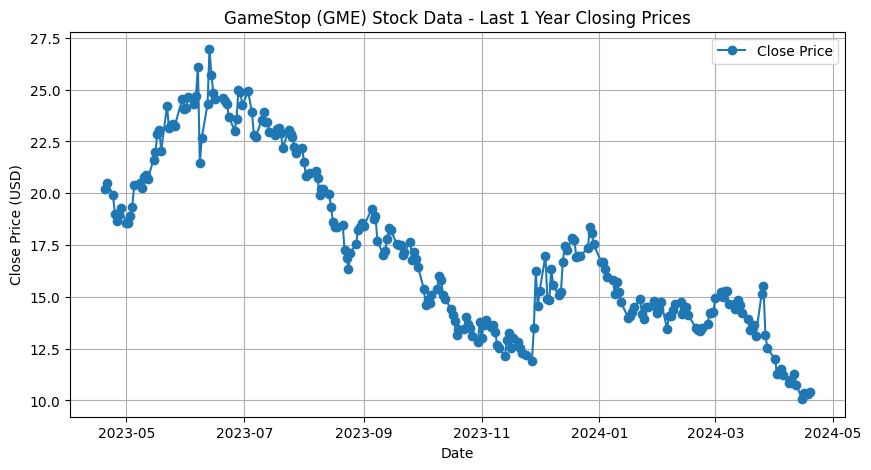

In [28]:
import yfinance as yf
import matplotlib.pyplot as plt

# Create a Ticker object for GameStop (ticker symbol: GME)
gme = yf.Ticker("GME")

# Retrieve historical data for GameStop with a specified period
gme_data = gme.history(period="1y")  # You can adjust the period as needed

# Define the make_graph function to plot the stock data
def make_graph(stock_data, title):
    plt.figure(figsize=(10, 5))  # Set the figure size for better visibility
    plt.plot(stock_data.index, stock_data['Close'], marker='o', label='Close Price')  # Plot Close price data
    plt.title(title)  # Title of the graph
    plt.xlabel('Date')  # Label for the x-axis
    plt.ylabel('Close Price (USD)')  # Label for the y-axis
    plt.legend()  # Show legend
    plt.grid(True)  # Show grid
    plt.show()  # Display the graph

# Use the make_graph function to graph the GameStop Stock Data
make_graph(gme_data, 'GameStop (GME) Stock Data - Last 1 Year Closing Prices')